In [1]:
import sys
sys.path.insert(1, '../')
import paths
import xarray
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rc
from paths import FIGURE_IMAGE_OUTPUT
import cartopy.crs as ccrs
import regionmask
from os import listdir
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
exp_num = "1111"
variable = "HWF"
time_begin = "2050"
time_end = "2080"
max_min = "max"
label = "Max. Temps"
region_selection = ["United States of America", "Mexico", "United Kingdom", "India", "Ecuador", "Chile", "Canada", "Greenland", "France", "United Arab Emirates", "Thailand", "China", "Egypt", "Libya", "Uganda", "Rwanda", "Macedonia", "Japan", "Philippines"]

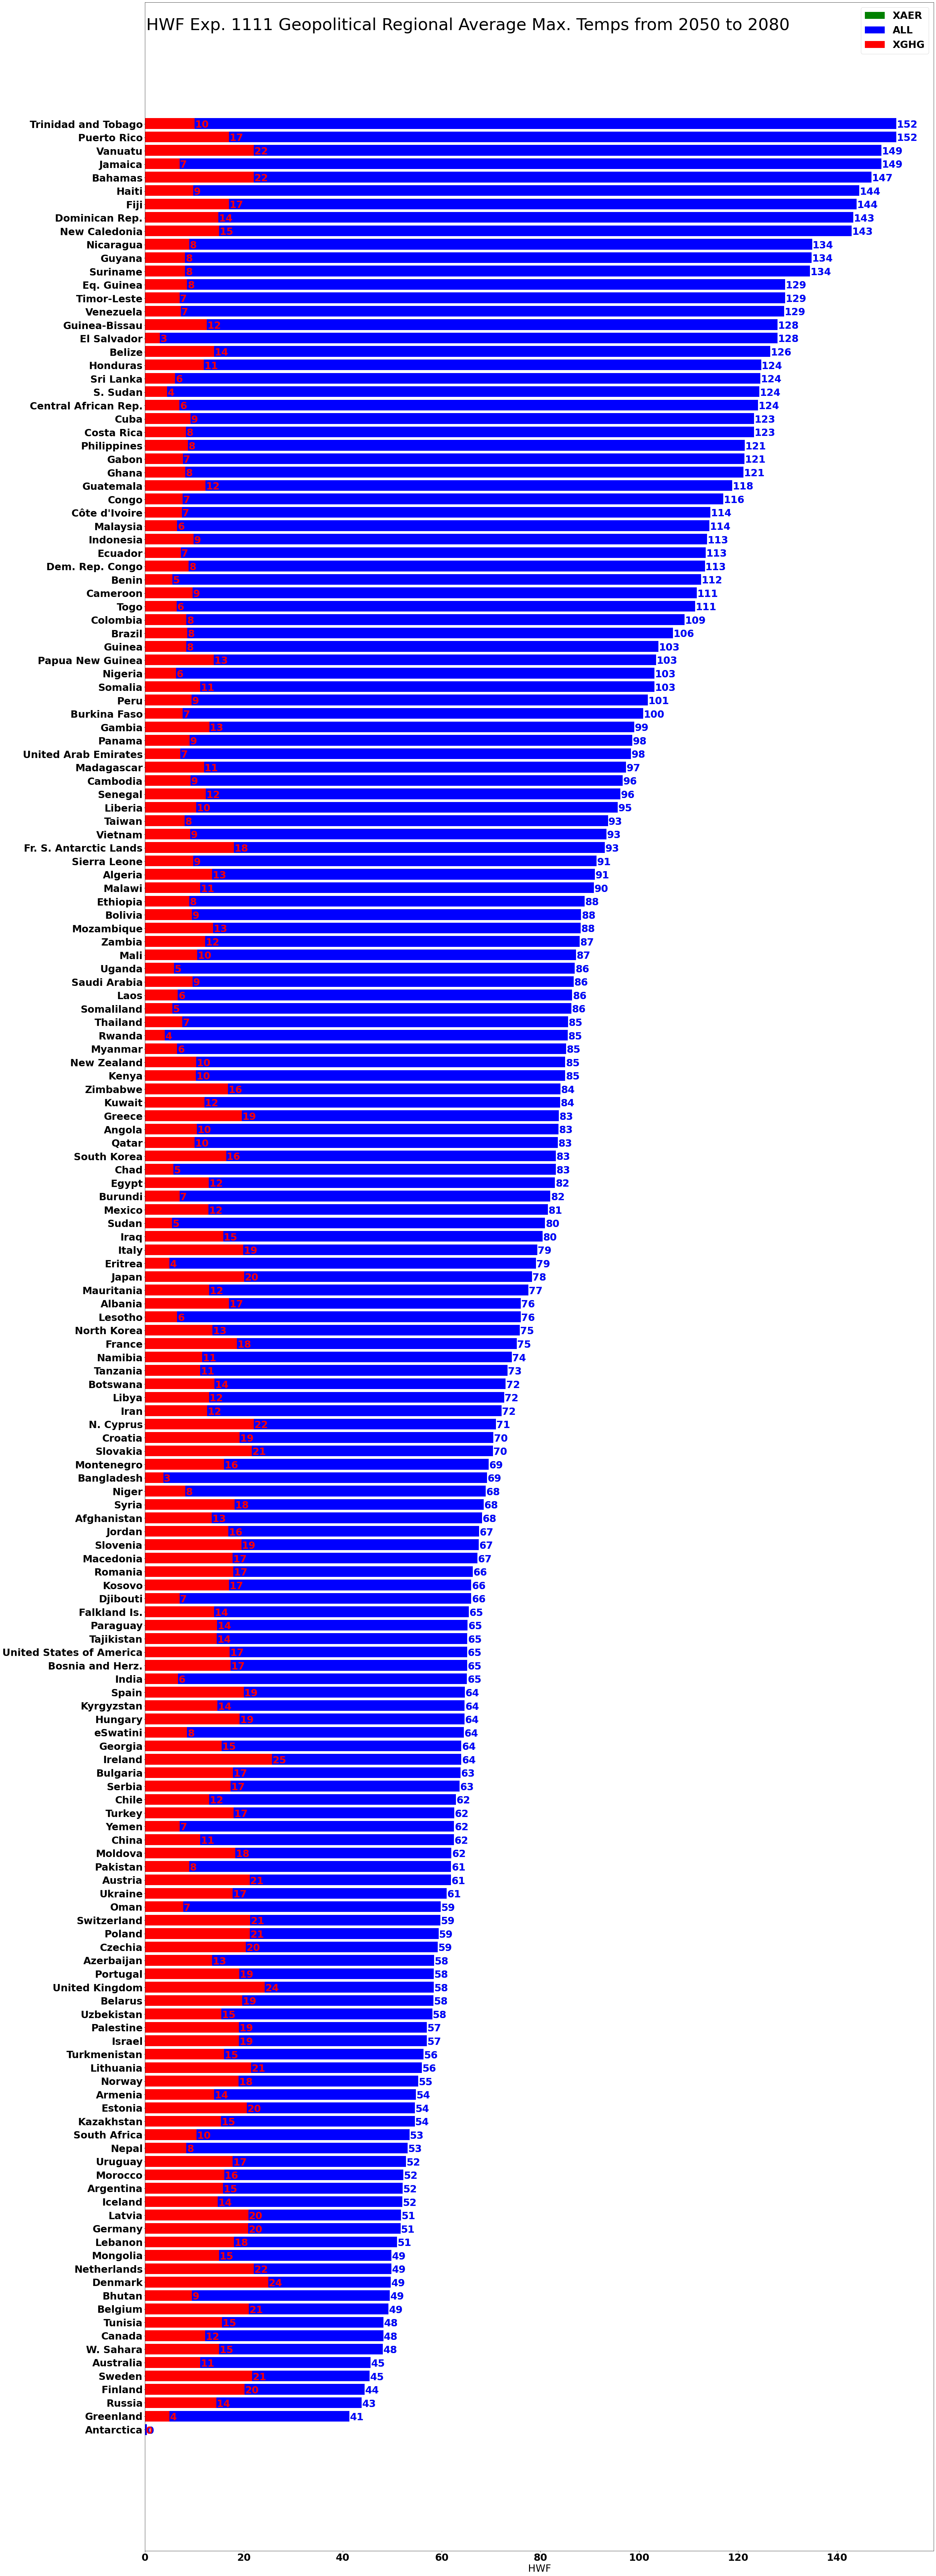

In [13]:
f, ax = plt.subplots(1, 1, figsize=(40, 110), facecolor='w')
f.suptitle(f"{variable} Exp. {exp_num} Geopolitical Regional Average {label} from {time_begin} to {time_end}", fontsize=50)
font = {'weight': 'bold',
        'size': 30}
rc('font', **font)


datasets = paths.get_paths_heat_output_avg(tmp_type=max_min, exp_num=exp_num)
all_data = xarray.open_dataset(datasets[0])[f"HWF_t{max_min[2]}90pct"].sel(time=(time_begin, time_end)).mean(dim="time").dt.days
xghg_data = xarray.open_dataset(datasets[1])[f"HWF_t{max_min[2]}90pct"].sel(time=(time_begin, time_end)).mean(dim="time").dt.days
xaer_data = xarray.open_dataset(datasets[2])[f"HWF_t{max_min[2]}90pct"].sel(time=(time_begin, time_end)).mean(dim="time").dt.days

#land = regionmask.defined_regions.natural_earth.land_110
def get_values(dataset):
    #dataset = dataset.where(land.mask(dataset) == 0)
    ar6 = regionmask.defined_regions.natural_earth.countries_110
    #ar6 = regionmask.defined_regions.natural_earth.us_states_50
    vals_labels = []
    for region in ar6:
        #if region.name in region_selection:
        value = dataset.where(ar6.mask(dataset) == region.number).mean(dim="lat", skipna=True).mean(dim="lon", skipna=True)
        if not np.isnan(value):
            vals_labels.append((region, value))
    return vals_labels

def match_sorting(vals_labels_template, vals_labels_out):
    vals_labels_ret = []
    for region_temp, val_temp in vals_labels_template:
        for region_out, val_out in vals_labels_out:
            if region_out.name == region_temp.name:
                vals_labels_ret.append((region_out, val_out))
    return vals_labels_ret

bar_height = 4
xaer_vals_labels = get_values(xaer_data)
xaer_vals_labels.sort(key = lambda x: x[1])

all_vals_labels = match_sorting(xaer_vals_labels, get_values(xaer_data))

x_labels = [""]*len(all_vals_labels)
for index, (region, val) in enumerate(xaer_vals_labels):
    bar = ax.barh(index*(bar_height+1), val, height=bar_height, align='center', color = "green", rasterized=True)
    x_labels[index] = region.name
bar.set_label("XAER")
for i, (region, v) in enumerate(xaer_vals_labels):
    if v >= 0:
        ax.text(v + 0.1, i*(bar_height + 1) - 1.5, int(np.floor(v.values)), color='green', fontweight='bold')
    else:
        ax.text(v - 0.7, i*(bar_height + 1) - 1.5, int(np.floor(v.values)), color='green', fontweight='bold')

x_labels = [""]*len(all_vals_labels)
for index, (region, val) in enumerate(all_vals_labels):
    bar = ax.barh(index*(bar_height+1), val, height=bar_height, align='center', color = "blue", rasterized=True)
    x_labels[index] = region.name
bar.set_label("ALL")
for i, (region, v) in enumerate(all_vals_labels):
    if v >= 0:
        ax.text(v + 0.1, i*(bar_height + 1) - 1.5, int(np.floor(v.values)), color='blue', fontweight='bold')
    else:
        ax.text(v - 0.7, i*(bar_height + 1) - 1.5, int(np.floor(v.values)), color='blue', fontweight='bold')

xghg_vals_labels = match_sorting(all_vals_labels, get_values(xghg_data))
x_labels = [""]*len(all_vals_labels)
for index, (region, val) in enumerate(xghg_vals_labels):
    bar = ax.barh(index*(bar_height+1), val, height=bar_height, align='center', color = "red", rasterized=True)
    x_labels[index] = region.name
for i, (region, v) in enumerate(xghg_vals_labels):
    if v >= 0:
        ax.text(v + 0.1, i*(bar_height + 1) - 1.5, int(np.floor(v.values)), color='red', fontweight='bold')
    else:
        ax.text(v - 0.7, i*(bar_height + 1) - 1.5, int(np.floor(v.values)), color='red', fontweight='bold')
bar.set_label("XGHG")
        
ax.set_yticks(np.linspace(0, (bar_height + 0.97)*(len(all_vals_labels)), len(all_vals_labels)))
ax.set_yticklabels(x_labels)
ax.set_xlabel(f'{variable}')
ax.legend()

f.tight_layout()
f.savefig(f"{FIGURE_IMAGE_OUTPUT}exp-{exp_num}-Countries-{variable}-{max_min}-{time_begin}-{time_end}-bar-stacked.png")


In [4]:
regionmask.defined_regions.natural_earth.us_states_50[0]

Region: Alaska (AK / 0)
center: [-152.72907802   64.57880465]